# Desafio

### Exercício: Explorando o Conjunto de Dados de Vendas de carros elétricos

**Objetivo:** Utilizar a biblioteca Pandas e Matplotlib para extrair e analisar informações dos conjuntos de dados de vendas de carros elétricos.
link: https://www.kaggle.com/datasets/patricklford/global-ev-sales-2010-2024

Desafios/etapas:
1. importar a biblioteca pandas no Jupyter
2. ler o arquivo .csv
3. apresentar informações básicas do dataset
4. limpar as linhas que possuirem dados vazios
5. plotar um gráfico do tipo "pie" verificando a contagem de cada tipo de veículos (coluna mode).
6. plotar um gráfico do tipo "bar" verificando as 10 primeiras regiões em quantidade de veículos.

In [1]:
# 1. importar a biblioteca pandas no Jupyter

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 2. ler o arquivo .csv

df = pd.read_csv('../dataset/IEA Global EV Data 2024.csv')  # .. serve para voltar 2 níveis paara achar o arquivo
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [7]:
# 3. apresentar informações básicas do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [9]:
# Verificar dados duplicados

df.duplicated().sum()       #caso aparecer 0 significa que não tem linhas iguais

0

In [11]:
# 4. limpar as linhas que possuirem dados vazios

df = df.dropna()
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [13]:
# 5. plotar um gráfico do tipo "pie" verificando a contagem de cada tipo de veículos (coluna mode).

df.head()
df['unit'].unique()    #tomar cuidade pois "mode" é uma palavra reservada 

# a coluna unit possui valores de unidades diferentes, portanto será necessários 
# definir a unidade para ser analisada

# A unidade será "vehicles" portanto é necessário criar um novo dataframe com 
#apenas essas linhas

df_vehicles  = df.loc[df['unit'] == 'Vehicles']

In [15]:
df_vehicles['unit'].unique()      #Verificar os tipos únicos da coluna 'unit'
df_vehicles['mode'].unique()      #Verificar os tipos únicos da coluna 'mode'

array(['Cars', 'Buses', 'Vans', 'Trucks'], dtype=object)

In [17]:
df_vehicles['mode'].value_counts()

mode
Cars      2975
Buses     1485
Vans      1449
Trucks     933
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1c555d13c20>,
 [Text(0.2236940701869681, 1.0770148387850504, 'Cars'),
  Text(-1.059475175108288, -0.29582486935560853, 'Buses'),
  Text(0.05351735479744666, -1.0986973617586802, 'Vans'),
  Text(1.0005952318392295, -0.45695643339447445, 'Trucks')],
 [Text(0.12201494737470986, 0.5874626393373001, '43.5%'),
  Text(-0.5778955500590661, -0.1613590196485137, '21.7%'),
  Text(0.0291912844349709, -0.5992894700501892, '21.2%'),
  Text(0.5457792173668524, -0.2492489636697133, '13.6%')])

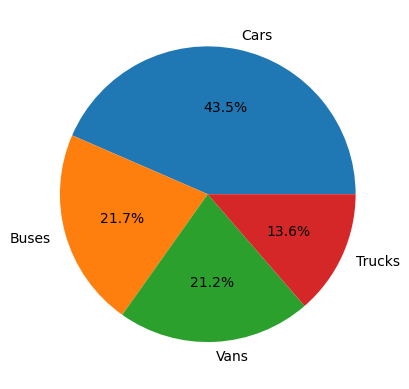

In [19]:
#plt.pie(valores, labels = etiquetas dos valores)
etiquetas = df_vehicles['mode'].unique()
valores = df_vehicles['mode'].value_counts()
plt.pie(valores, labels = etiquetas, autopct = '%1.1f%%')

In [21]:
# 6. plotar um gráfico do tipo "bar" verificando as 10 primeiras regiões em quantidade de veículos.

df_vehicles.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


In [23]:
df_vehicles['value'].dtype
df_vehicles.groupby('region')['value'].sum()

region
Australia               5.788320e+05
Austria                 8.719660e+05
Belgium                 1.687010e+06
Brazil                  2.649470e+05
Bulgaria                4.623000e+03
Canada                  2.416440e+06
Chile                   1.445800e+04
China                   1.148052e+09
Colombia                1.602300e+04
Costa Rica              2.763100e+04
Croatia                 7.557000e+03
Cyprus                  2.260000e+03
Czech Republic          3.430000e+04
Denmark                 1.102561e+06
EU27                    3.324256e+07
Estonia                 4.585000e+03
Europe                  5.937754e+08
Finland                 7.427230e+05
France                  6.787772e+06
Germany                 1.020111e+07
Greece                  1.053560e+05
Hungary                 4.203500e+04
Iceland                 1.897660e+05
India                   6.341878e+07
Ireland                 8.857000e+04
Israel                  4.821870e+05
Italy                   1.86004

In [25]:
# Quando se agrupa o dataframe por região e somando a coluna 'value' existe uma transformação do dataframe para dicionário

#df_vehicles.groupby('region')['value'].sum().head(10).plot(kind = 'bar')
dictionary_vehicles = df_vehicles.groupby('region')['value'].sum()
dictionary_vehicles.keys()
#sorted(dictionary_vehicles) #ordem descrescente 

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'EU27', 'Estonia', 'Europe', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Rest of the world', 'Romania', 'Seychelles',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkiye', 'USA', 'United Arab Emirates',
       'United Kingdom', 'World'],
      dtype='object', name='region')

<BarContainer object of 10 artists>

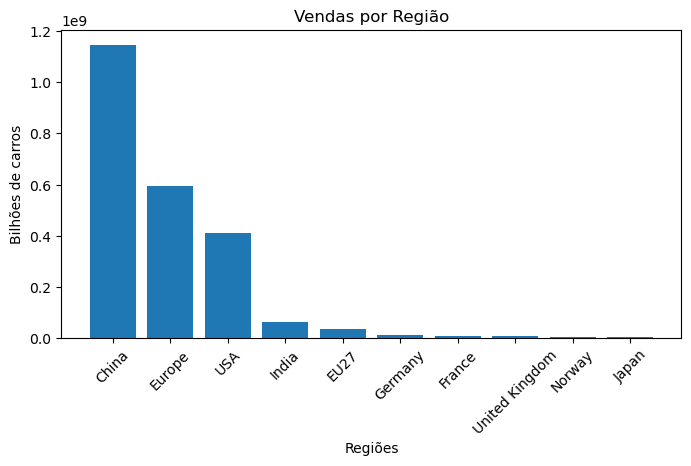

In [68]:
# O tipo de dado dicionário nao possui os metodos 
df_vehicles_region = pd.DataFrame(dictionary_vehicles.items(), columns = ['Regiões', 'Valores'])
#df_vehicles_region.sort_values(by=['Value'], ascending = False)    #decrescente (falso)
#df_vehicles_region

#Filtra o DataFrame as linhas que fore diferente de 'World' e 'Rest of the world' para a coluna
#'Regiões'. Organiza as linhas em ordem descrescente e apresenta apenas as primeiras 10 linhas.
df_topTen = df_vehicles_region.loc[(df_vehicles_region['Regiões'] != 'World') & 
                       (df_vehicles_region['Regiões'] != 'Rest of the world')] \
                       .sort_values(by=['Valores'], ascending = False) \
                       .head(10)
df_topTen        #DataFrame contendo os 10 maiores vendas de veículos em ordem descrescente

x = df_topTen['Regiões']           #Dados da coluna Regiões
y = df_topTen['Valores']           #Dados da coluna Valores
plt.figure(figsize = (8,4))        #Define o tamanho da figura comprimento por altura
plt.title('Vendas por Região')     #Título do gráfico
plt.xlabel('Regiões')              #Etiqueta eixo X
plt.ylabel('Bilhões de carros')    #Etiqueta eixo Y
plt.xticks(rotation = 45)          #Organiza as etiquetas do eixo X em diagonal
plt.bar(x,y)                       #Plotagem do gráfico tipo Bar (Barra)

In [76]:
df_vehicles['year'].sort_values().unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2025, 2030, 2035], dtype=int64)

In [78]:
df_vehicles['powertrain'].unique()

array(['BEV', 'PHEV', 'FCEV'], dtype=object)

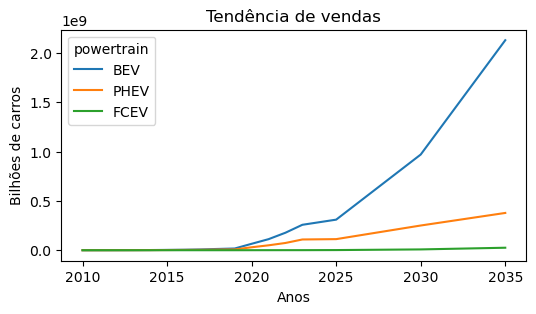

In [112]:
df_BEV = df_vehicles.loc[df_vehicles['powertrain'] == 'BEV']
df_PHEV = df_vehicles.loc[df_vehicles['powertrain'] == 'PHEV']
df_FCEV = df_vehicles.loc[df_vehicles['powertrain'] == 'FCEV']

BEV = df_BEV.groupby('year')['value'].sum()
PHEV = df_PHEV.groupby('year')['value'].sum()
FCEV = df_FCEV.groupby('year')['value'].sum()
plt.figure(figsize = (6,3))          #Define o tamanho da figura comprimento por altura
plt.title('Tendência de vendas')     #Título do gráfico
plt.xlabel('Anos')                   #Etiqueta eixo X
plt.ylabel('Bilhões de carros')      #Etiqueta eixo Y
plt.plot(BEV, label = 'BEV')
plt.plot(PHEV, label = 'PHEV')
plt.plot(FCEV, label = 'FCEV')
plt.legend(title= 'powertrain')